In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def solution(x):
    sol = np.exp(np.sin(0.25*np.pi*x**2))
    return sol

In [3]:
def pos_func(x, xi, xi_1):
    return ((x-xi)/(xi_1 - xi))**2

In [4]:
def neg_func(x, xi, xi_1):
    return ((xi_1 - x)/(xi_1 - xi))**2

In [5]:
def prod_func(x, xi, xi_1):
    return (pos_func(x, xi, xi_1)**0.5)*(neg_func(x, xi, xi_1)**0.5)

In [6]:
def pos_sol(x, xi, xi_1):
    return (pos_func(x, xi, xi_1)**0.5)*solution(x)

In [7]:
def neg_sol(x, xi, xi_1):
    return (neg_func(x, xi, xi_1)**0.5)*solution(x)

In [8]:
def subs_neg_func(x, xi, xi_1):
    return (solution(x) - neg_func(x, xi, xi_1)**0.5)**2

In [9]:
def subs_pos_func(x, xi, xi_1):
    return (solution(x) - pos_func(x, xi, xi_1)**0.5)**2

In [10]:
def numerical_intergation(func, xi, xi_1, ci = None, ci_1 = None):
    pts = [-1*np.sqrt(3/5), 0, np.sqrt(3/5)]
    weights = [5/9, 8/9, 5/9]
    
    integral = 0
    
    if func== "error" and ci and ci_1:
        for i in range(len(weights)):
            x = xi*((1-pts[i])/2) + xi_1*((1+pts[i])/2)
            integral+= ((solution(x) - ci_1*pos_func(x, xi, xi_1)**0.5 - ci*neg_func(x, xi, xi_1)**0.5)**2)*weights[i]
            
    
    # elif func== "neg_error" and c:
    #     for i in range(len(weights)):
    #         integral+= ((solution(pts[i]) - c*neg_func(pts[i], xi, xi_1)**0.5)**2)*weights[i]  
            
            
    else:
        for i in range(len(weights)):
            x = xi*((1-pts[i])/2) + xi_1*((1+pts[i])/2)
            integral+= func(x, xi, xi_1)*weights[i]
            
    # else:
    #     for i in range(len(weights)):
    #         integral+= func(pts[i])*weights[i]
        
    return integral

In [11]:
def jacobian(xi, xi_1):
    return (xi_1-xi)/2

In [12]:
def construct_A(x_ini, x_final, n, pos_func, neg_func):
    
    A = np.zeros((n+1,n+1))
    
    for i in range(n):
        xi = x_ini + i*((x_final - x_ini)/n)
        xi_1 = x_ini + (i+1)*((x_final - x_ini)/n)
        jac = jacobian(xi, xi_1)
        A_2d = np.zeros((2,2))
        A_2d[0,0] += (numerical_intergation(neg_func, xi, xi_1)*jac)
        A_2d[0,1] += (numerical_intergation(prod_func, xi, xi_1)*jac)
        A_2d[1,0] += (numerical_intergation(prod_func, xi, xi_1)*jac)
        A_2d[1,1] += (numerical_intergation(pos_func, xi, xi_1)*jac)
        
        A[i:i+2, i:i+2] += A_2d
        
    return A
        

In [13]:
def construct_f(x_ini, x_final, n, pos_sol, neg_sol):
    f = np.zeros((n+1,1))
    
    for i in range(n):
        xi = x_ini + i*((x_final - x_ini)/n)
        xi_1 = x_ini + (i+1)*((x_final - x_ini)/n)
        jac = jacobian(xi, xi_1)
        f_2d = np.zeros((2,1))
        f_2d[0,0] += (numerical_intergation(neg_sol, xi, xi_1)*jac)
        f_2d[1,0] += (numerical_intergation(pos_sol, xi, xi_1)*jac)
            
        
        f[i:i+2] +=f_2d
    return f
        

In [14]:
def construct_c(A,f):
    A_inv = np.linalg.inv(A)
    C = np.matmul(A_inv, f)
    return C

In [15]:
def cal_error(x_ini, x_final, n, C):
    error = 0
    for i in range(n):
        xi = x_ini + i*((x_final - x_ini)/n)
        xi_1 = x_ini + (i+1)*((x_final - x_ini)/n)
        jac = jacobian(xi, xi_1)
        # error += numerical_intergation(lambda x: solution(x) - C[i] * (neg_func(x, xi, xi_1))**0.5, xi, xi_1)*jac
        # error += numerical_intergation(lambda x: solution(x) - C[i+1] * (pos_func(x, xi, xi_1))**0.5, xi, xi_1)*jac
        
        # error += numerical_intergation("error", xi, xi_1, C[i]) * jac
        error += numerical_intergation("error", xi, xi_1, C[i], C[i+1]) * jac
        
        # error += numerical_intergation(
        #     lambda x, xi, xi_1: (solution(x) - C[i] * neg_func(x, xi, xi_1)**0.5)**2, xi, xi_1
        # ) * jac
        
        # error += numerical_intergation(
        #     lambda x, xi, xi_1: (solution(x) - C[i + 1] * pos_func(x, xi, xi_1)**0.5)**2, xi, xi_1
        # ) * jac
            
    return (error)**0.5

In [16]:
x_ini = 0
x_final = 3

In [17]:
n_elements = 1
error = 1
elements_array = []
e_arr = []
error_array = []
while error > 1e-5:
    A = construct_A(x_ini, x_final, n_elements, pos_func, neg_func)
    f = construct_f(x_ini, x_final, n_elements, pos_sol, neg_sol)
    C = construct_c(A,f)
    error = cal_error(x_ini, x_final, n_elements, C)
    error_array.append(error)
    elements_array.append((x_final-x_ini)/n_elements)
    e_arr.append(n_elements)
    n_elements +=1
    


In [18]:
error_array[50], 

(array([0.00189947]),)

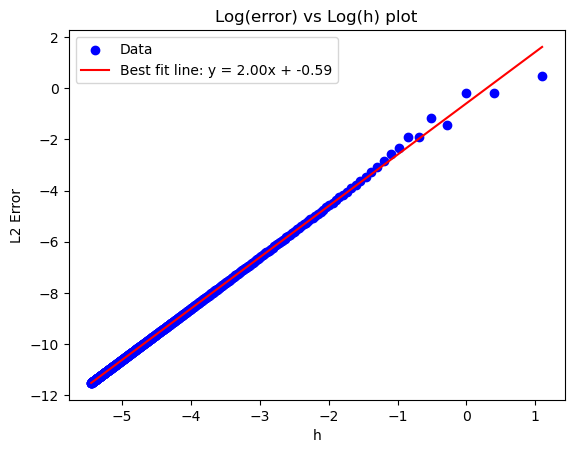

In [19]:
x = np.log(elements_array)
y = np.log(error_array)
slope, intercept = np.polyfit(x, y, 1)
# Convert slope and intercept to scalars
slope = slope.item() if isinstance(slope, np.ndarray) else slope
intercept = intercept.item() if isinstance(intercept, np.ndarray) else intercept


# Create the best fit line
y_fit = slope * x + intercept

# Plot the original data points
plt.scatter(x, y, color='blue', label='Data')

# Plot the best-fit line
plt.plot(x, y_fit, color='red', label=f'Best fit line: y = {slope:.2f}x + {intercept:.2f}')
plt.title("Log(error) vs Log(h) plot")

# Add labels and legend
plt.xlabel('h')
plt.ylabel('L2 Error')
plt.legend()

# Show the plot
plt.show()

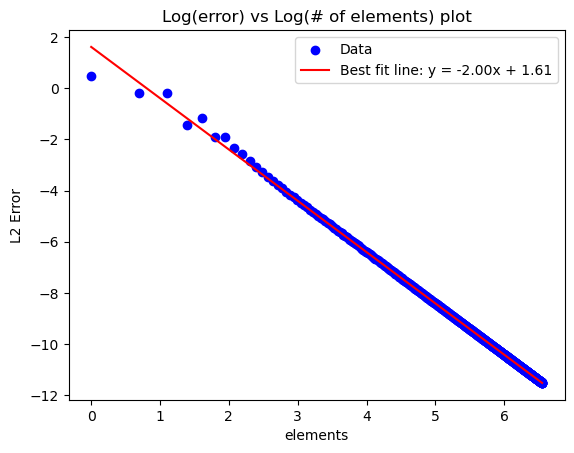

In [20]:
x = np.log(e_arr)
y = np.log(error_array)
slope, intercept = np.polyfit(x, y, 1)
# Convert slope and intercept to scalars
slope = slope.item() if isinstance(slope, np.ndarray) else slope
intercept = intercept.item() if isinstance(intercept, np.ndarray) else intercept


# Create the best fit line
y_fit = slope * x + intercept

# Plot the original data points
plt.scatter(x, y, color='blue', label='Data')

# Plot the best-fit line
plt.plot(x, y_fit, color='red', label=f'Best fit line: y = {slope:.2f}x + {intercept:.2f}')
plt.title("Log(error) vs Log(# of elements) plot")

# Add labels and legend
plt.xlabel('elements')
plt.ylabel('L2 Error')
plt.legend()

# Show the plot
plt.show()

In [21]:
n_elements

700

In [22]:
C.shape

(700, 1)

In [23]:
n_elements

700

In [24]:
error

array([9.98350303e-06])

In [25]:
C

array([[0.99999759],
       [1.00001206],
       [1.00005546],
       [1.0001278 ],
       [1.00022909],
       [1.00035933],
       [1.00051853],
       [1.00070672],
       [1.0009239 ],
       [1.00117009],
       [1.00144532],
       [1.00174961],
       [1.00208299],
       [1.00244548],
       [1.00283712],
       [1.00325793],
       [1.00370797],
       [1.00418726],
       [1.00469584],
       [1.00523377],
       [1.00580108],
       [1.00639783],
       [1.00702407],
       [1.00767985],
       [1.00836523],
       [1.00908027],
       [1.00982502],
       [1.01059956],
       [1.01140394],
       [1.01223825],
       [1.01310254],
       [1.0139969 ],
       [1.0149214 ],
       [1.01587612],
       [1.01686114],
       [1.01787654],
       [1.01892242],
       [1.01999885],
       [1.02110594],
       [1.02224378],
       [1.02341246],
       [1.02461208],
       [1.02584274],
       [1.02710455],
       [1.02839762],
       [1.02972205],
       [1.03107795],
       [1.032

In [26]:
x_array = np.linspace(0,3, 1000)
sol = solution(x_array)

In [27]:
i_sol = np.zeros(len(x_array))
for i in range(len(x_array)):
    x = x_array[i]
    for j in range(len(C) - 1):
        xi = x_ini + j*((x_final - x_ini)/(len(C) - 1))
        xi_1 = x_ini + (j+1)*((x_final - x_ini)/(len(C) - 1))
        if xi<=x<xi_1:
            i_sol[i] += C[j]*neg_func(x, xi, xi_1)**0.5
            i_sol[i] += C[j+1]*pos_func(x,xi,xi_1)**0.5
        if x == x_final and xi_1 == x_final:
            i_sol[i] += C[j]*neg_func(x, xi, xi_1)**0.5
            i_sol[i] += C[j+1]*pos_func(x,xi,xi_1)**0.5
    

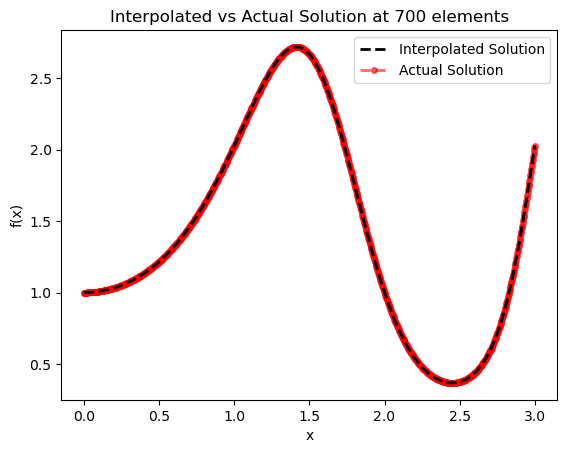

In [28]:
# Plot the actual solution with a solid blue line
plt.plot(x_array, i_sol, color='black', linestyle='--', label='Interpolated Solution', linewidth=2, zorder=2)

# Plot the interpolated solution with a dashed red line and circle markers
plt.plot(x_array, sol, linestyle='--', color='r', marker='o', label='Actual Solution', 
         linewidth=2, markersize=4, zorder=1, alpha=0.6)

# Add labels to the axes
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title("Interpolated vs Actual Solution at 700 elements")
# Add a legend to distinguish the two plots
plt.legend(loc='best')

# Show the plot
plt.show()